In [1]:
import new_pipe

Creating dataframe
Importing
Creating dates
Making table with obvious features


/Users/rachelwhaley/Documents/MPCS/30254-MLPP/project/epa-rcra-violations/full_pipeline_files/has_violation.py:70: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prev_vios = pd.concat([prev_vios, vios_this_yr], ignore_index=True)


LQGs
Number of facilities
Early and Late / Evaluations
2011
2012
2013
2014
2015
2016
2017
2018
Merging
Cleaning
Dataframe created
Creating temporal split
running models
DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 25}


<Figure size 432x288 with 0 Axes>

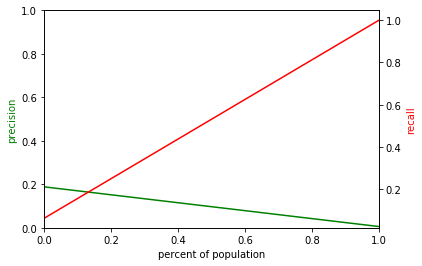

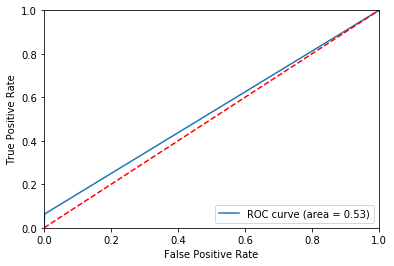

DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 25}


<Figure size 432x288 with 0 Axes>

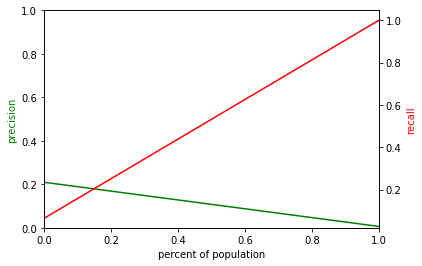

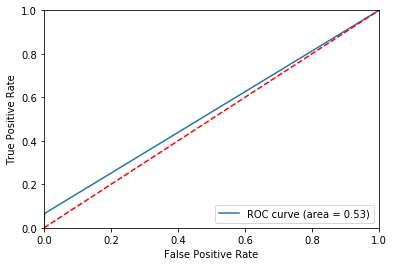

DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 25}


<Figure size 432x288 with 0 Axes>

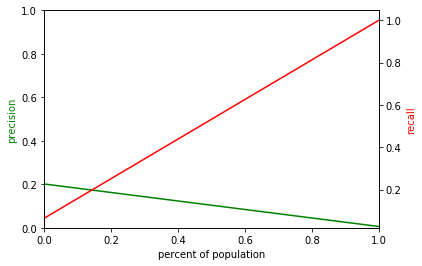

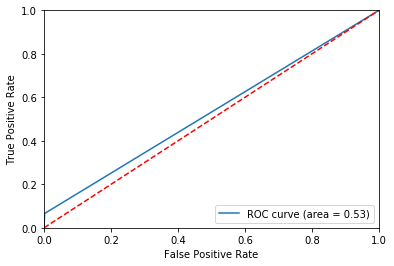

DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 25}


<Figure size 432x288 with 0 Axes>

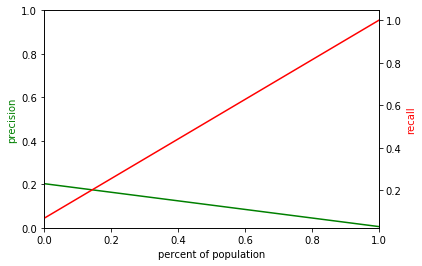

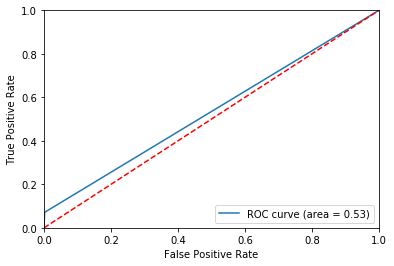

DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 25}


<Figure size 432x288 with 0 Axes>

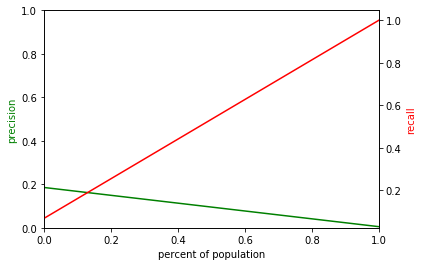

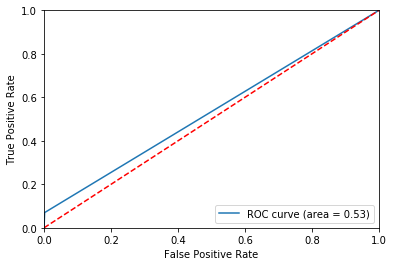

In [2]:
predictions, models, metrics = new_pipe.pipeline()

In [14]:
predictions[0].shape

(1041254, 2)

In [10]:
predictions[0][predictions[0]['truth'] == 1]

,"DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 25}_at_0.2pct",truth
330,0,1.0
1172,0,1.0
3735,0,1.0
4932,0,1.0
5852,0,1.0
6073,0,1.0
6531,0,1.0
7496,0,1.0
8158,0,1.0
8291,0,1.0


In [11]:
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

In [12]:
import has_violation

In [15]:
# need a copy of the features df
df = has_violation.go()

Importing
Creating dates
Making table with obvious features


/Users/rachelwhaley/Documents/MPCS/30254-MLPP/project/epa-rcra-violations/full_pipeline_files/has_violation.py:70: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prev_vios = pd.concat([prev_vios, vios_this_yr], ignore_index=True)


LQGs
Number of facilities
Early and Late / Evaluations
2011
2012
2013
2014
2015
2016
2017
2018
Merging
Cleaning


NameError: name 'add_acs_features' is not defined

In [19]:
new_pipe.add_acs_features(df)

In [18]:
df.shape

(8330032, 43)

In [20]:
df.shape

(8330032, 44)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8330032 entries, 0 to 8330031
Data columns (total 44 columns):
ID_NUMBER                              object
YEAR_EVALUATED                         int64
HasViolation                           float64
DAYS_SINCE_VIOLATIONS_IN_ID_NUMBER     float64
DAYS_SINCE_VIOLATIONS_IN_STATE_CODE    float64
DAYS_SINCE_VIOLATIONS_IN_ZIP_CODE      float64
NUMBER_VIOLATIONS_IN_ID_NUMBER         float64
NUMBER_VIOLATIONS_IN_STATE_CODE        float64
NUMBER_VIOLATIONS_IN_ZIP_CODE          float64
IsLQG                                  int64
IsTSDF                                 int64
NumInMyState                           float64
NumInMyZIP                             float64
early  ID_NUMBER avg                   float64
early  ID_NUMBER sum                   float64
early  ID_NUMBER count                 float64
last early  ID_NUMBER                  float64
early  ZIP_CODE avg                    float64
early  ZIP_CODE sum                    float64
e

In [24]:
def add_acs_features(df):
    acs = pd.read_csv('all_acs_data.csv')
    acs['median income'].fillna(0, inplace=True)
    acs['median income'] = acs['median income'].apply(lambda x: x if x > 0
                                                         else 0)
    df['acs_year'] = df['YEAR_EVALUATED'].where(df['YEAR_EVALUATED'] < 2017,
                                                   2016)
    df = df.merge(acs, left_on=['ID_NUMBER', 'acs_year'], right_on=['ID_NUMBER',
                                                                       'year'], how="left")
    df.drop('acs_year', axis=1, inplace=True)
    return df

In [26]:
import pandas as pd

In [27]:
acs_added_df = add_acs_features(df)

In [28]:
acs_added_df.shape

(8330032, 70)

In [29]:
acs_added_df.head()

,ID_NUMBER,YEAR_EVALUATED,HasViolation,DAYS_SINCE_VIOLATIONS_IN_ID_NUMBER,DAYS_SINCE_VIOLATIONS_IN_STATE_CODE,DAYS_SINCE_VIOLATIONS_IN_ZIP_CODE,NUMBER_VIOLATIONS_IN_ID_NUMBER,NUMBER_VIOLATIONS_IN_STATE_CODE,NUMBER_VIOLATIONS_IN_ZIP_CODE,IsLQG,...,1p50to1p74,1p75to1p84,1p85to1p99_x,under_p5_y,p5top99,1to1p24_y,1p25to1p49_y,1p50to1p84,1p85to1p99_y,2andver
0,LAD985226075,2011,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1,...,0.176471,0.088235,0.147059,0.001176,0.004548,0.004391,0.066724,0.077152,0.038811,0.807198
1,LAD985226075,2012,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1,...,0.229167,0.029412,0.111520,0.021070,0.059337,0.024877,0.071349,0.045094,0.042140,0.736134
2,LAD985226075,2013,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1,...,0.141667,0.000000,0.150000,0.001307,0.008204,0.004865,0.104407,0.040224,0.047049,0.793945
3,LAD985226075,2014,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1,...,0.362069,0.172414,0.068966,0.001305,0.003045,0.004351,0.064970,0.045827,0.041549,0.838953
4,LAD985226075,2015,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1,...,0.000000,0.000000,0.000000,0.000638,0.000993,0.000142,0.054319,0.040420,0.047511,0.855978


In [30]:
acs_added_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8330032 entries, 0 to 8330031
Data columns (total 70 columns):
ID_NUMBER                              object
YEAR_EVALUATED                         int64
HasViolation                           float64
DAYS_SINCE_VIOLATIONS_IN_ID_NUMBER     float64
DAYS_SINCE_VIOLATIONS_IN_STATE_CODE    float64
DAYS_SINCE_VIOLATIONS_IN_ZIP_CODE      float64
NUMBER_VIOLATIONS_IN_ID_NUMBER         float64
NUMBER_VIOLATIONS_IN_STATE_CODE        float64
NUMBER_VIOLATIONS_IN_ZIP_CODE          float64
IsLQG                                  int64
IsTSDF                                 int64
NumInMyState                           float64
NumInMyZIP                             float64
early  ID_NUMBER avg                   float64
early  ID_NUMBER sum                   float64
early  ID_NUMBER count                 float64
last early  ID_NUMBER                  float64
early  ZIP_CODE avg                    float64
early  ZIP_CODE sum                    float64
e

In [31]:
# formatting the df into entity_id 	score 	label_value --> categorical variable 
len(predictions)

5

In [39]:
def continuous_to_discrete(df, var, num):
    buckets = np.linspace(df[var].min(), df[var].max(), num=num)
    df[var] = pd.cut(df[var], buckets)
    return df

In [40]:
import numpy as np

In [41]:
acs_added_CONT_df = continuous_to_discrete(acs_added_df, "median income", 5)

TypeError: data type not understood

In [38]:
acs_added_CONT_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8330032 entries, 0 to 8330031
Data columns (total 70 columns):
ID_NUMBER                              object
YEAR_EVALUATED                         int64
HasViolation                           float64
DAYS_SINCE_VIOLATIONS_IN_ID_NUMBER     float64
DAYS_SINCE_VIOLATIONS_IN_STATE_CODE    float64
DAYS_SINCE_VIOLATIONS_IN_ZIP_CODE      float64
NUMBER_VIOLATIONS_IN_ID_NUMBER         float64
NUMBER_VIOLATIONS_IN_STATE_CODE        float64
NUMBER_VIOLATIONS_IN_ZIP_CODE          float64
IsLQG                                  int64
IsTSDF                                 int64
NumInMyState                           float64
NumInMyZIP                             float64
early  ID_NUMBER avg                   float64
early  ID_NUMBER sum                   float64
early  ID_NUMBER count                 float64
last early  ID_NUMBER                  float64
early  ZIP_CODE avg                    float64
early  ZIP_CODE sum                    float64
e

In [44]:
acs_added_CONT_df["median income"].head(30)

0          (0.0, 62500.25]
1          (0.0, 62500.25]
2          (0.0, 62500.25]
3          (0.0, 62500.25]
4          (0.0, 62500.25]
5     (62500.25, 125000.5]
6     (62500.25, 125000.5]
7     (62500.25, 125000.5]
8          (0.0, 62500.25]
9          (0.0, 62500.25]
10         (0.0, 62500.25]
11         (0.0, 62500.25]
12         (0.0, 62500.25]
13         (0.0, 62500.25]
14         (0.0, 62500.25]
15         (0.0, 62500.25]
16         (0.0, 62500.25]
17         (0.0, 62500.25]
18         (0.0, 62500.25]
19         (0.0, 62500.25]
20         (0.0, 62500.25]
21         (0.0, 62500.25]
22         (0.0, 62500.25]
23         (0.0, 62500.25]
24         (0.0, 62500.25]
25         (0.0, 62500.25]
26         (0.0, 62500.25]
27         (0.0, 62500.25]
28    (62500.25, 125000.5]
29         (0.0, 62500.25]
Name: median income, dtype: category
Categories (4, interval[float64]): [(0.0, 62500.25] < (62500.25, 125000.5] < (125000.5, 187500.75] < (187500.75, 250001.0]]

In [46]:
predictions[0].shape

(1041254, 2)

In [47]:
acs_added_CONT_df.shape

(8330032, 70)

In [48]:
pred_to_test = predictions[0]

In [50]:
df_for_equity = pred_to_test.merge(acs_added_CONT_df["median income"], left_index=True, right_index=True)

In [51]:
df_for_equity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041254 entries, 0 to 1041253
Data columns (total 3 columns):
DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 25}_at_0.2pct    1041254 non-null int64
truth                                                                         1041254 non-null float64
median income                                                                 1005148 non-null category
dtypes: category(1), float64(1), int64(1)
memory usage: 24.8 MB


In [56]:
df_for_equity.rename(columns={"DT{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 25}_at_0.2pct":'score', "truth":'label_value'},inplace=True)

In [57]:
g=Group()
xtab, _ = g.get_crosstabs(df_for_equity)

Exception: get_crosstabs: input df was not preprocessed. There are non-string cols within attr_cols!

In [59]:
df_for_equity['label_value'] = df_for_equity['label_value'].astype(int)

In [60]:
df_for_equity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041254 entries, 0 to 1041253
Data columns (total 3 columns):
score            1041254 non-null int64
label_value      1041254 non-null int64
median income    1005148 non-null category
dtypes: category(1), int64(2)
memory usage: 24.8 MB


In [61]:
g=Group()
xtab, _ = g.get_crosstabs(df_for_equity)

Exception: get_crosstabs: input df was not preprocessed. There are non-string cols within attr_cols!

In [64]:
df_for_equity['median income'] = df_for_equity['median income'].astype(str)

In [65]:
df_for_equity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041254 entries, 0 to 1041253
Data columns (total 3 columns):
score            1041254 non-null int64
label_value      1041254 non-null int64
median income    1041254 non-null object
dtypes: int64(2), object(1)
memory usage: 31.8+ MB


In [66]:
g=Group()
xtab, _ = g.get_crosstabs(df_for_equity)

model_id, score_thresholds 1 {'rank_abs': [2048]}


In [67]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [68]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,1,binary 0/1,2048,median income,"(0.0, 62500.25]",1464,739735,1187,3996,735739,277,4273,736926,741199,1041254
1,1,binary 0/1,2048,median income,"(125000.5, 187500.75]",19,12143,15,72,12071,4,76,12086,12162,1041254
2,1,binary 0/1,2048,median income,"(187500.75, 250001.0]",2,1097,2,8,1089,0,8,1091,1099,1041254
3,1,binary 0/1,2048,median income,"(62500.25, 125000.5]",501,250187,406,1395,248792,95,1490,249198,250688,1041254
4,1,binary 0/1,2048,median income,nan,62,36044,53,199,35845,9,208,35898,36106,1041254


In [69]:
aqp = Plot()

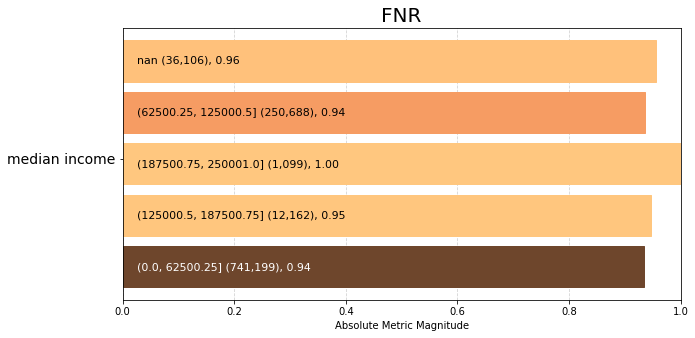

In [70]:
fnr = aqp.plot_group_metric(xtab, 'fnr')

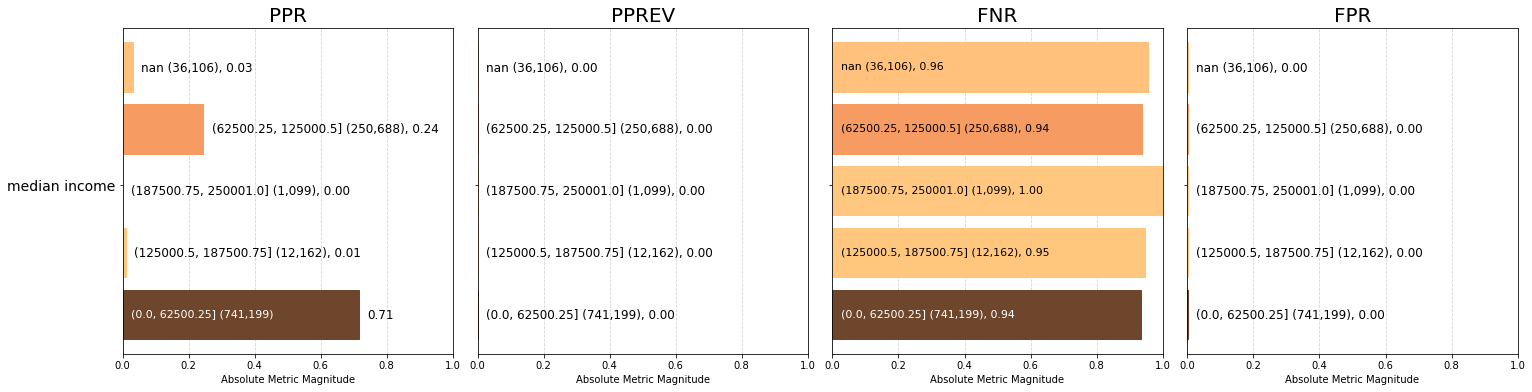

In [71]:
p = aqp.plot_group_metric_all(xtab, metrics=['ppr','pprev','fnr','fpr'], ncols=4)

In [72]:
b = Bias()

In [73]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=df, ref_groups_dict={'median income':'(187500.75, 250001.0]'}, alpha=0.05, mask_significance=True)
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,1,binary 0/1,2048,median income,"(0.0, 62500.25]",0.0648256,0.998389,0.00540193,0.810792,0.00161075,0.935174,0.994598,0.189208,1464,739735,0.714844,0.00197518,1187,3996,735739,277,4273,736926,741199,1041254,0.00576498,732,1.08536,10,0.810792,0.74074,0.878661,0.935174,10,1.00022,1.0019,"(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]"
1,1,binary 0/1,2048,median income,"(125000.5, 187500.75]",0.0526316,0.998759,0.00592934,0.789474,0.00124111,0.947368,0.994071,0.210526,19,12143,0.00927734,0.00156224,15,72,12071,4,76,12086,12162,1041254,0.00624897,9.5,0.858453,10,0.789474,0.813061,0.677023,0.947368,10,1.00059,1.00137,"(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]"
2,1,binary 0/1,2048,median income,"(187500.75, 250001.0]",0,0.998167,0.00729262,1,0.00183318,1,0.992707,0,2,1097,0.000976562,0.00181984,2,8,1089,0,8,1091,1099,1041254,0.00727934,1,1,nan,1,1,1,1,nan,1,1,"(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]"
3,1,binary 0/1,2048,median income,"(62500.25, 125000.5]",0.0637584,0.998371,0.00557583,0.810379,0.00162923,0.936242,0.994424,0.189621,501,250187,0.244629,0.0019985,406,1395,248792,95,1490,249198,250688,1041254,0.00594364,250.5,1.09818,10,0.810379,0.764586,0.888743,0.936242,10,1.0002,1.00173,"(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]"
4,1,binary 0/1,2048,median income,nan,0.0432692,0.998524,0.00552103,0.854839,0.00147641,0.956731,0.994479,0.145161,62,36044,0.0302734,0.00171717,53,199,35845,9,208,35898,36106,1041254,0.00576082,31,0.943583,10,0.854839,0.757071,0.805379,0.956731,10,1.00036,1.00178,"(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]","(187500.75, 250001.0]"


In [75]:
calculated_disparities = b.list_disparities(bdf)
disparity_significance = b.list_significance(bdf)

In [76]:
bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median income,"(0.0, 62500.25]",732.0,1.085360,10.0,0.810792,0.740740,0.878661,0.935174,10.0,1.000223,1.001905
1,median income,"(125000.5, 187500.75]",9.5,0.858453,10.0,0.789474,0.813061,0.677023,0.947368,10.0,1.000593,1.001373
2,median income,"(187500.75, 250001.0]",1.0,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000
3,median income,"(62500.25, 125000.5]",250.5,1.098176,10.0,0.810379,0.764586,0.888743,0.936242,10.0,1.000204,1.001729
4,median income,nan,31.0,0.943583,10.0,0.854839,0.757071,0.805379,0.956731,10.0,1.000357,1.001785


In [77]:
hbdf = b.get_disparity_predefined_groups(xtab, original_df=df, 
                                         ref_groups_dict={'median income':'(187500.75, 250001.0]'},
                                         alpha=0.05,
                                         mask_significance=False)

get_disparity_predefined_group()


In [78]:
hbdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median income,"(0.0, 62500.25]",732.0,1.085360,10.0,0.810792,0.740740,0.878661,0.935174,10.0,1.000223,1.001905
1,median income,"(125000.5, 187500.75]",9.5,0.858453,10.0,0.789474,0.813061,0.677023,0.947368,10.0,1.000593,1.001373
2,median income,"(187500.75, 250001.0]",1.0,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000
3,median income,"(62500.25, 125000.5]",250.5,1.098176,10.0,0.810379,0.764586,0.888743,0.936242,10.0,1.000204,1.001729
4,median income,nan,31.0,0.943583,10.0,0.854839,0.757071,0.805379,0.956731,10.0,1.000357,1.001785


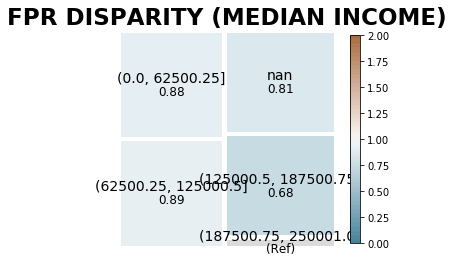

In [79]:
aqp.plot_disparity(bdf, group_metric='fpr_disparity', attribute_name='median income', significance_alpha=0.05)

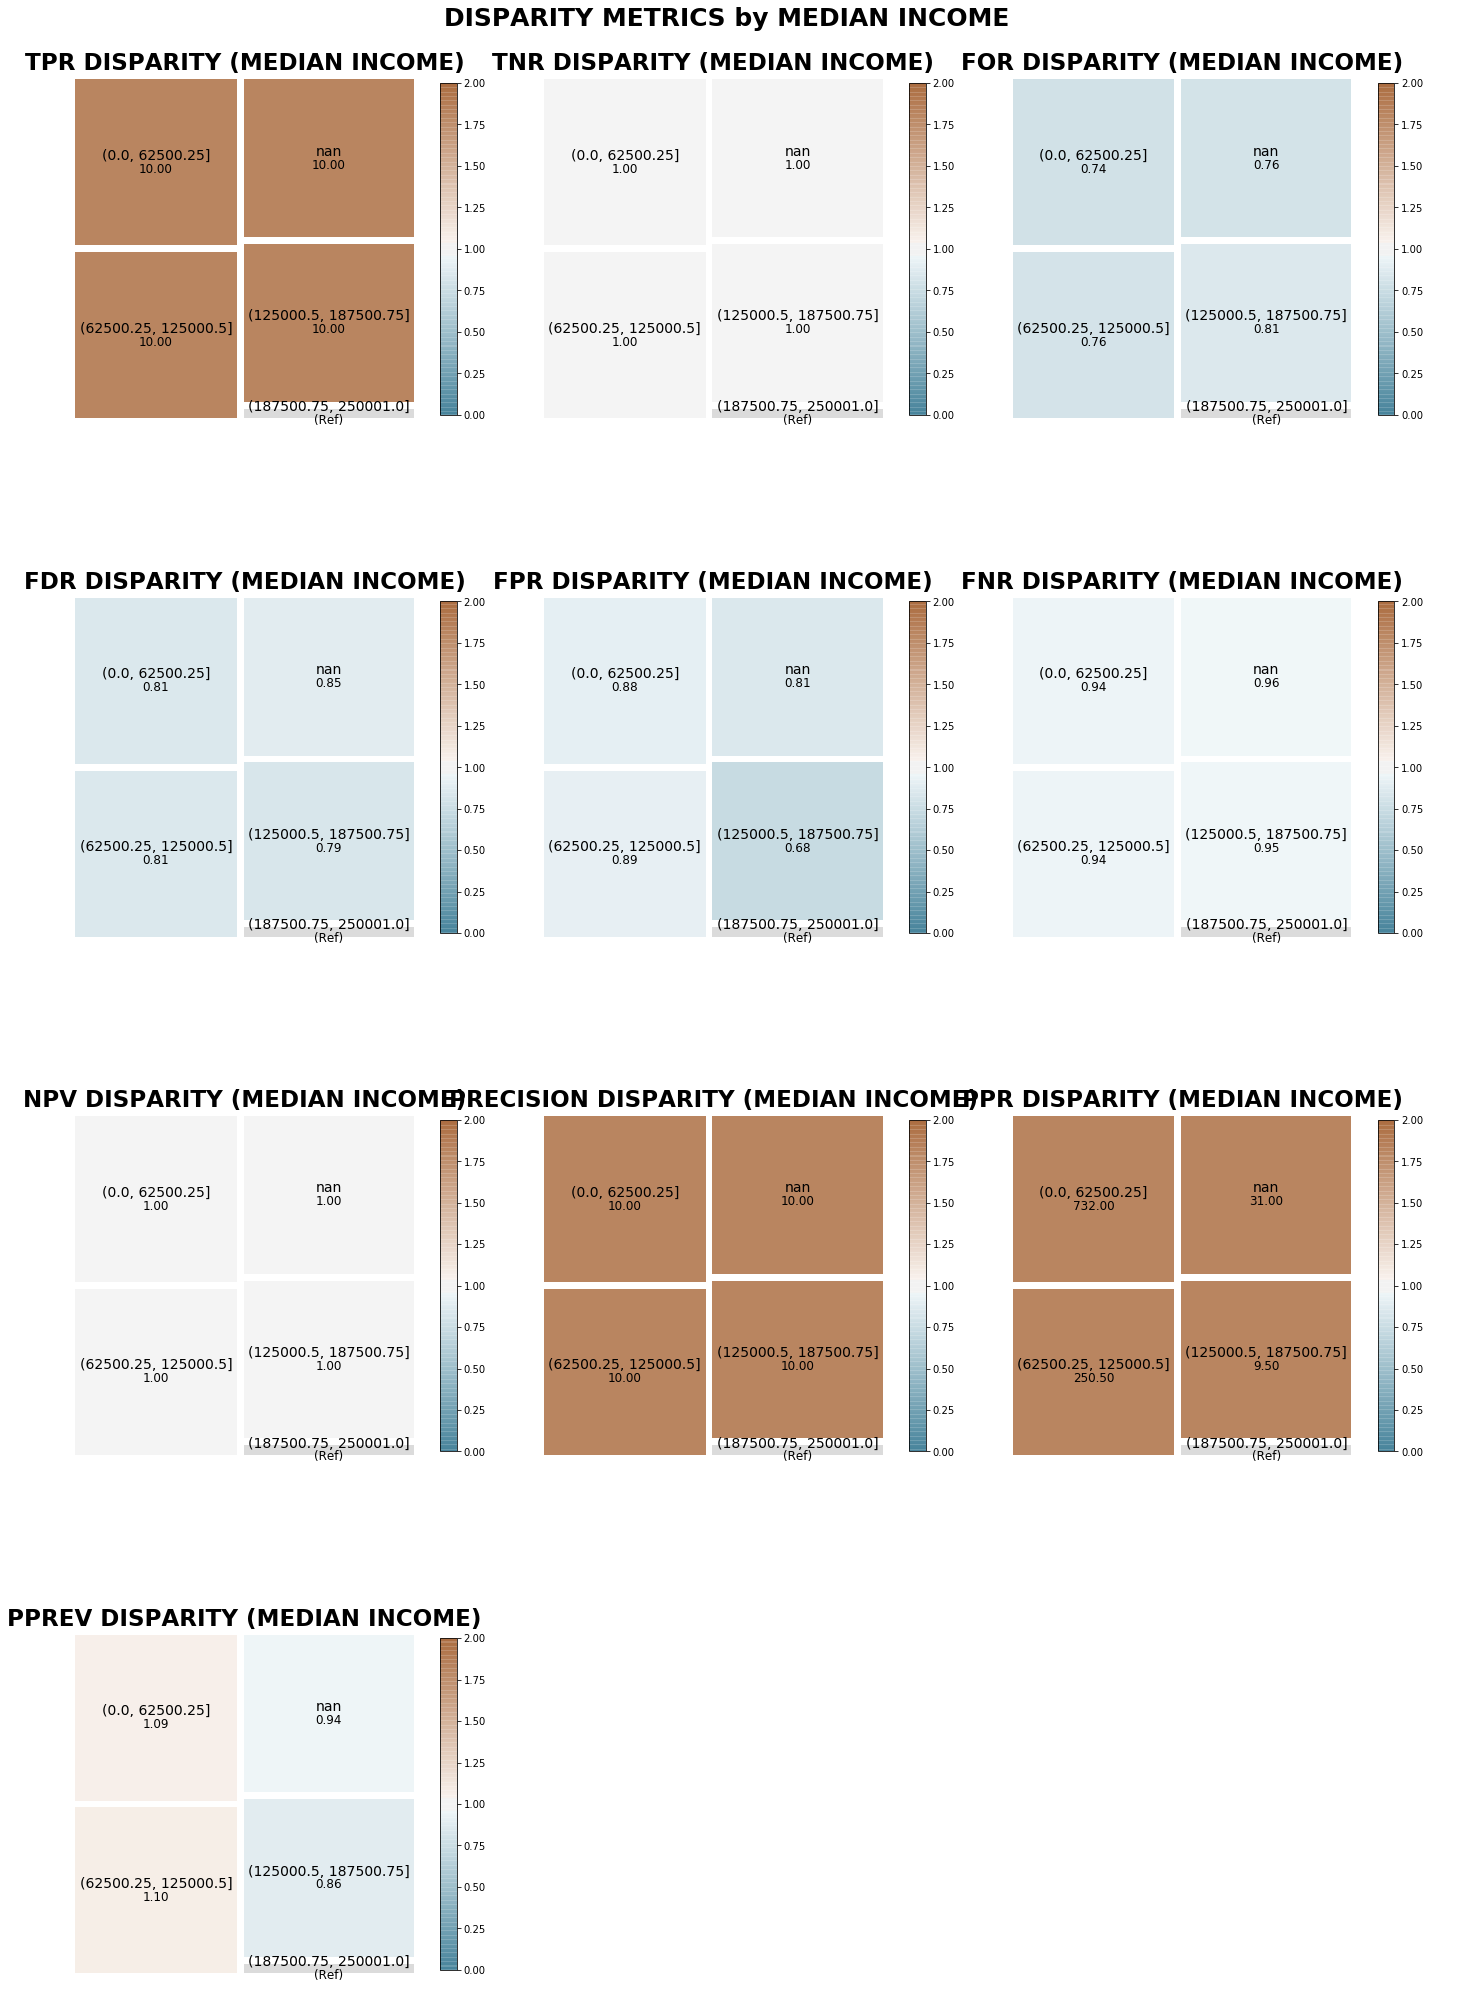

In [80]:
tm_capped = aqp.plot_disparity_all(hbdf, attributes=['median income'], metrics = 'all', significance_alpha=0.05)

In [ ]:
df_for_equity2 = pred_to_test.merge(acs_added_CONT_df, left_index=True, right_index=True)